**Imports**

In [ ]:
# Dependencies
!pip install pandas
!pip install tensorflow
!pip install scikit-learn --user
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [215]:
import pandas as pd
import tensorflow as tf
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import euclidean_distances

# Question 1
**Write a program to calculate Euclidean Distance.**
**Instruction:** Euclidean Distance Calculation. In this question you will compute Euclidean distance between elements in n-dimensional space. Each coordinate of a point in n-dimensional space is sampled from Uniform distribution. Use Numpy library.

Create Dataset

In [213]:
# Parameters for Dataset
instances = 500
features = 3

data1 = np.random.uniform( low=0, high=1, size=(instances, features)) #sampled from Uniform distribution
data2 = np.random.uniform( low=0, high=1, size=(instances, features)) #sampled from Uniform distribution

In [226]:
print( 'Data1: ',data1,data1.shape )
print( 'Data2: ', data2,data2.shape )

Data1:  [[0.35847408 0.03418792 0.28876396]
 [0.78074429 0.5411553  0.40492829]
 [0.88044507 0.71921186 0.20671949]
 ...
 [0.19299919 0.01191242 0.02481273]
 [0.1032982  0.32799928 0.48938589]
 [0.86442295 0.49217398 0.0549513 ]] (500, 3)
Data2:  [[0.56539687 0.28220238 0.00586594]
 [0.18881413 0.86305189 0.90818461]
 [0.93617781 0.49008558 0.73072621]
 ...
 [0.72176867 0.01160163 0.20657344]
 [0.49157224 0.25317561 0.72839185]
 [0.46068416 0.83648981 0.55942867]] (500, 3)


Now, finding euclidean distance between each sample point in the two data, using sklearn

In [218]:
print(euclidean_distances(data1,data2))

[[0.42937106 1.04856184 0.85843748 ... 0.37315999 0.50886482 0.85287432]
 [0.52218951 0.84099088 0.36457095 ... 0.56855066 0.52075085 0.4620945 ]
 [0.57495635 0.99553836 0.57461991 ... 0.72518305 0.80034612 0.56067557]
 ...
 [0.46053846 1.22670363 1.13105167 ... 0.55913702 0.80148448 1.01852703]
 [0.67039098 0.684826   0.8821596  ... 0.75006404 0.46203805 0.6254545 ]
 [0.36866522 1.14978467 0.67957697 ... 0.52372636 0.80601492 0.73215833]]


Now, using Euclidean Distance function, from scratch using numpy

In [225]:
def euclidean_distance(x,y):
  distances = []
  for a in x:
    distance = []
    for b in y:
      distance.append(np.linalg.norm(a - b))
    distances.append(np.array(distance))
  return np.array(distances)
euclidean_distance(data1,data2)

array([[0.42937106, 1.04856184, 0.85843748, ..., 0.37315999, 0.50886482,
        0.85287432],
       [0.52218951, 0.84099088, 0.36457095, ..., 0.56855066, 0.52075085,
        0.4620945 ],
       [0.57495635, 0.99553836, 0.57461991, ..., 0.72518305, 0.80034612,
        0.56067557],
       ...,
       [0.46053846, 1.22670363, 1.13105167, ..., 0.55913702, 0.80148448,
        1.01852703],
       [0.67039098, 0.684826  , 0.8821596 , ..., 0.75006404, 0.46203805,
        0.6254545 ],
       [0.36866522, 1.14978467, 0.67957697, ..., 0.52372636, 0.80601492,
        0.73215833]])

# Question 2
**Write a program to implement Linear Regression.** <br>
**Instruction:** In this question you will implement linear regression model using three Python packages:  <br>
scikit-learn, numpy, and tensorflow.  <br>
Use ‘Iris dataset (https://archive.ics.uci.edu/ml/datasets/iris)’.  <br>
The grader expects the first value to be the y_intercept (a) and then the rest of the coefficients.


In [ ]:
filepath = 'https://drive.google.com/file/d/1LkwjepbuI_UuuxyWBSeRZHX9ocncY7rh/view?usp=sharing'
file_id = filepath.split('/')[-2]
filepath ='https://drive.google.com/uc?id=' + file_id
iris_df = pd.read_csv(filepath,header=None, names=('SepalLength','SepalWidth','PetalLength','PetalWidth','PlantClass',))
print("DATASET")
iris_df

DATASET


,SepalLength,SepalWidth,PetalLength,PetalWidth,PlantClass
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

In [ ]:
iris_df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("Number of Sampels:",iris_df.shape[0])
print("Number of Features:",iris_df.shape[1]-1) #-1 for excluding class label

Number of Sampels: 150
Number of Features: 4


In [ ]:
print("Checking for Class Imbalance")
print("Class Distribution")
print(iris_df['PlantClass'].value_counts())

Checking for Class Imbalance
Class Distribution
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: PlantClass, dtype: int64


            X         Y  labels
0   -2.684207  0.326607       0
1   -2.715391 -0.169557       0
2   -2.889820 -0.137346       0
3   -2.746437 -0.311124       0
4   -2.728593  0.333925       0
..        ...       ...     ...
145  1.944017  0.187415       2
146  1.525664 -0.375021       2
147  1.764046  0.078519       2
148  1.901629  0.115877       2
149  1.389666 -0.282887       2

[150 rows x 3 columns]


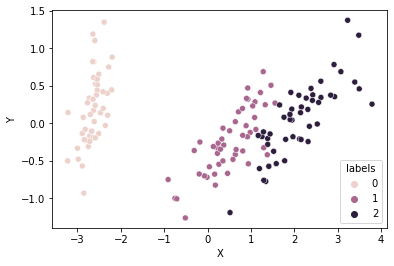

In [ ]:
# Reducing number of features for visualization
X = iris_df.drop("PlantClass",axis=1)
y = iris_df['PlantClass']
# Encode the Class Labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df = pd.DataFrame(X_pca,columns=('X','Y',))
df['labels'] = y
print(df)
sns.scatterplot(data=df, x="X", y="Y", hue="labels")

Conclusions from EDA <br>
> ->Equal number of sample of each class is present <br>
> ->Dataset is quite small <br>
> ->One of the three classes are easily distinguishable, however other two overlap a little, <br>
  so chances of confusion between these two classes, would check using confusion matrix


Split Dataset into Testing-Training

In [190]:
## Uncomment if Required
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,stratify=y)
# X_train.shape

## Linear Regression using Numpy
Equation for Normal Equations to calculate weights: image.png <br>
Reference: Bishop Book page 142

In [ ]:
def numpy_linear_regression(X, y):
    '''
    The method takes in training data of features and labels.
    
    Returns: Two parameters-
            -> y_intercept
            -> rest of the coefficients
    '''
    X_train = X.copy()
    y_train = y.copy()
    X_train.insert(0, 'ones', np.ones((X_train.shape[0],1))) # X.shape[0] gives the number of instances in X dataframe, append a column of ones as the first column
    intercept_weights = np.dot( np.linalg.inv( (np.dot(X_train.T, X_train)) ), np.dot( X_train.T, y_train) )   #perform the operations given in equation to get the weights
    return intercept_weights[0], intercept_weights[1:]

In [191]:
result = numpy_linear_regression(X,y)
print("Intercept:",result[0])
print("Coefficients:",result[1])

Intercept: 0.19208399482819133
Coefficients: [-0.10974146 -0.04424045  0.22700138  0.60989412]


## Linear Regression using Scikit-Learn

In [147]:
def sklearn_linear_regression(X,y):
  '''
  The method takes in training data of features and labels.
  
  Returns: Two parameters-
          -> y_intercept
          -> rest of the coefficients
  '''
  regressor = LinearRegression()
  regressor.fit(X, y)
  coefficients = regressor.coef_
  intercept = regressor.intercept_
  return intercept, coefficients


In [148]:
result = sklearn_linear_regression(X,y)
print("Intercept:",result[0])
print("Coefficients:",result[1])

Intercept: 0.19208399482813865
Coefficients: [-0.10974146 -0.04424045  0.22700138  0.60989412]


# Linear Regression using TensorFlow

In [167]:
def tensorflow_linear_regression(X, y):
    '''
    The method takes in training data of features and labels.
    
    Returns: Two parameters-
            -> y_intercept
            -> rest of the coefficients
    '''
    X = X.to_numpy()
    y = np.array(y).reshape((150,1))
    instance_count = X.shape[1] # get number of features
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    weights = tf.constant(X, dtype="float", name="weights")
    bias = tf.constant(y, dtype="float", name="bias")
    trans = tf.transpose(weights)
    a = tf.matmul(trans, weights)
    b = tf.linalg.inv(a)
    c = tf.matmul(b, trans)
    theta = tf.matmul(c, y)
    theta_value = theta.numpy().reshape(-1)
    return theta_value[0], theta_value[1:]

In [200]:
result = tensorflow_linear_regression(X,y)
print("Intercept:",result[0])
print("Coefficients:",result[1])

Intercept: 0.19200426
Coefficients: [-0.10972989 -0.04423443  0.22699767  0.6098999 ]


# THANK YOU 